<a href="https://colab.research.google.com/github/Daniil71/analysis_researches/blob/main/spotify_phillip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Будем изучать датасет из топ-треков Spotify с Филиппин. Экзотичность в сочетании с большим набором числовых атрибутов.
# https://www.kaggle.com/jcacperalta/spotify-daily-top-200-ph?select=spotify_daily_charts_artists.csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 12,7
tracks = pd.read_csv('spotify_daily_charts_tracks.csv')
# для начала уберём все id от Spotify, переведём дату выпуска в datetime
# и длительность композиции из миллисекунд в секунды
tracks = tracks[['track_name','artist_name',
       'duration', 'release_date', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']]
       
tracks['release_date'] = pd.to_datetime(tracks['release_date'], errors = 'coerce')
tracks['duration'] = round(tracks['duration'] / 1000) 
tracks.head()

,track_name,artist_name,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Versace on the Floor,Bruno Mars,261.0,2016-11-17,72,0.578,0.574,2.0,-6.209,1.0,0.0454,0.196,0.00000,0.0830,0.301,174.152
1,Say You Won't Let Go,James Arthur,211.0,2016-10-28,82,0.358,0.557,10.0,-7.398,1.0,0.0590,0.695,0.00000,0.0902,0.494,85.043
2,Closer,The Chainsmokers,245.0,2016-07-29,82,0.748,0.524,8.0,-5.599,1.0,0.0338,0.414,0.00000,0.1110,0.661,95.010
3,All We Know,The Chainsmokers,194.0,2016-09-29,68,0.662,0.586,0.0,-8.821,1.0,0.0307,0.097,0.00272,0.1150,0.296,90.000
4,Don't Wanna Know,Maroon 5,214.0,2016-10-11,0,0.783,0.623,7.0,-6.126,1.0,0.0800,0.338,0.00000,0.0975,0.447,100.048


In [26]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4255 entries, 0 to 4254
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   track_name        4250 non-null   object        
 1   artist_name       4250 non-null   object        
 2   duration          4255 non-null   float64       
 3   release_date      4250 non-null   datetime64[ns]
 4   popularity        4255 non-null   int64         
 5   danceability      4254 non-null   float64       
 6   energy            4254 non-null   float64       
 7   key               4254 non-null   float64       
 8   loudness          4254 non-null   float64       
 9   mode              4254 non-null   float64       
 10  speechiness       4254 non-null   float64       
 11  acousticness      4254 non-null   float64       
 12  instrumentalness  4254 non-null   float64       
 13  liveness          4254 non-null   float64       
 14  valence           4254 n

Среднее время 214.55
Отклонение:  47.62


Text(214.55, -4, 'Среднее')

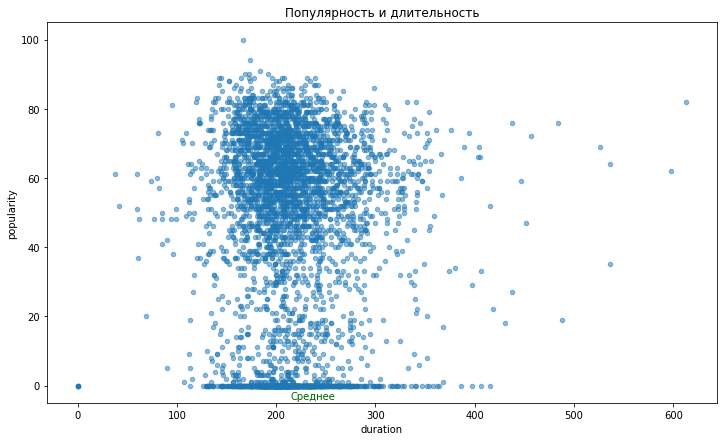

In [27]:
# Проверим следуюзщую гипотезу: 
# Длительность всех/практически всех популярных песен должна укладываться в средние значения длительности
print('Среднее время', round(tracks['duration'].mean(),2))
print('Отклонение: ',round(tracks['duration'].std(),2))
tracks.plot(kind = 'scatter',
            x = 'duration',
            y = 'popularity',
            alpha = 0.5,
            title = 'Популярность и длительность'
            )
plt.annotate( 'Среднее', (round(tracks['duration'].mean(),2),-4), color = 'darkgreen')


In [28]:
# Среди популярных есть парочка долгих.
# Посмотрим, что это за композиции.
# Всё песни самых популярных исполнителей
tracks[(tracks['popularity'] > 70.0) & (tracks['duration'] > 420)]

,track_name,artist_name,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
3159,Mirrors,Justin Timberlake,484.0,2013-03-15,76,0.574,0.512,5.0,-6.664,0.0,0.0503,0.234,0.0000,0.0946,0.512,76.899
3270,Just the Two of Us (feat. Bill Withers),"Grover Washington, Jr.",438.0,1985-01-01,76,0.749,0.497,10.0,-12.609,0.0,0.1050,0.410,0.0499,0.0504,0.585,95.818
3893,All Too Well (10 Minute Version) (Taylor's Ver...,Taylor Swift,613.0,2021-11-12,82,0.631,0.518,0.0,-8.771,1.0,0.0303,0.274,0.0000,0.0880,0.205,93.023
4086,It's All Coming Back to Me Now,Céline Dion,457.0,1996-02-28,72,0.384,0.438,0.0,-9.149,1.0,0.0362,0.753,0.0000,0.1010,0.287,87.903


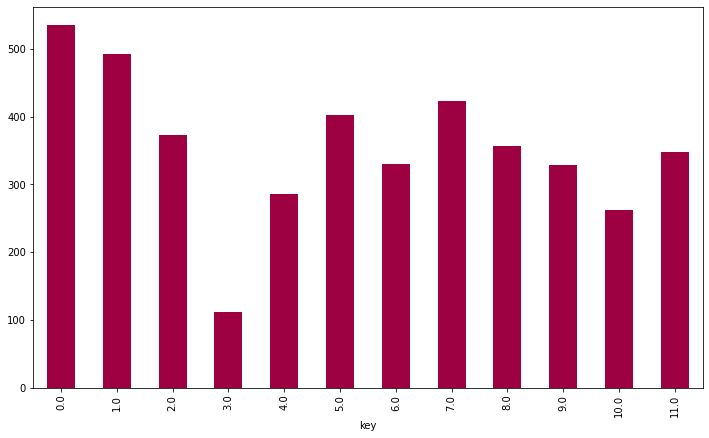

In [29]:
# Несколько песен начинались с одной и той же ноты.
# Проверим, равномерно ли распределены начальные ноты ( точнее, звуковысотные классы )
# Гипотеза: композиции чаще начинаются с одной и той же ноты
# Расшифровка ключей с 0.0:  C, C#/D♭, D, D#/E♭, E, F, F#/G♭, G, G#/A♭, A, A#/B♭, B
first_key = tracks.groupby('key').count()['track_name']
first_key.plot(kind = 'bar', colormap='Spectral')
# 0.0 и 1.0 - До(C) и близкая к ней До-диез(C#) - самые частые ноты.

In [30]:
# А если учесть при этом популярность? Может, популярные начинаются с друих нот?
# Сгруппируем по ключам и по разбитой на 10 отрезков популярности и подсчитаем песни.
first_key_pop = tracks.groupby(['key',pd.cut(tracks['popularity'], [10,20,30,40,50,60,70,80,90,100])]).count()['track_name']
first_key_pop = tracks.pivot_table(
                        index='key', 
                        columns=pd.cut(tracks['popularity'], [-1,10,20,30,40,50,60,70,80,90,100]), 
                        values='track_name', 
                        aggfunc='count')

first_key_pop

popularity,"(-1, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]","(80, 90]","(90, 100]"
key,,,,,,,,,,
0.0,129,16,9,25,56,88,108,87,17,0
1.0,111,23,9,21,42,95,87,80,24,0
2.0,79,14,9,21,37,78,70,54,11,0
3.0,27,1,2,4,8,15,21,26,8,0
4.0,56,3,14,15,25,44,72,44,12,1
5.0,99,11,8,25,35,74,84,52,15,0
6.0,82,12,7,11,30,54,74,49,10,1
7.0,105,14,12,19,40,83,87,50,13,0
8.0,89,16,14,17,27,54,61,57,21,1


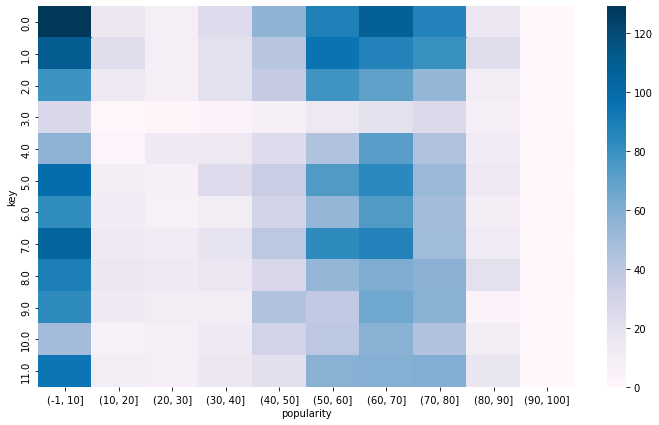

In [31]:
sns.heatmap(first_key_pop, cmap = 'PuBu')

In [32]:
# Практически при любой популярности песни До и До-диез - самые частые.

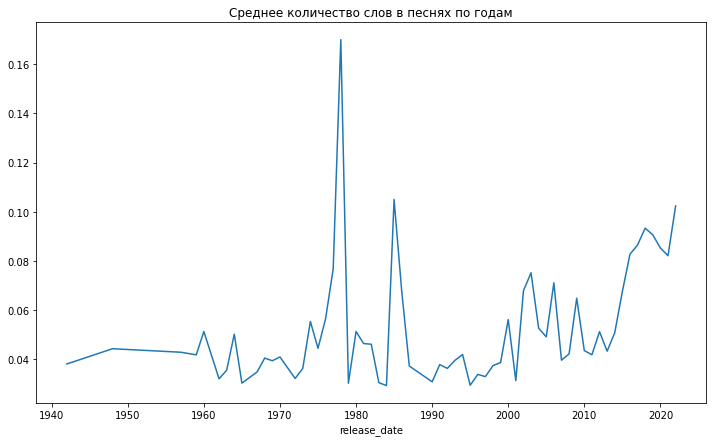

In [33]:
# Существует мнение, что песни 60-80-ых были "умнее" - больше текста, интереснее музыка. Музыку не проверим, а вот текст можно:
speech_by_year = tracks.groupby(pd.DatetimeIndex(tracks['release_date']).year)['speechiness'].mean()
speech_by_year.plot(kind = 'line', title = 'Среднее количество слов в песнях по годам')

In [34]:
# 90-ые - это провал. А вообще музыка 2000 и дальше вполне себе полна слов.
# Что за удивительные композиции из 75-80-ых?
tracks[( pd.DatetimeIndex(tracks['release_date']).year > 1973 ) & ( pd.DatetimeIndex(tracks['release_date']).year < 1980 )]

,track_name,artist_name,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1730,Bohemian Rhapsody - Remastered 2011,Queen,354.0,1975-11-21,71,0.392,0.402,0.0,-9.961,0.0,0.0536,0.2880,0.000000,0.243,0.228,143.883
1742,Somebody To Love - Remastered 2011,Queen,296.0,1976-12-10,67,0.497,0.693,8.0,-7.024,1.0,0.0565,0.1900,0.000000,0.215,0.358,111.539
1746,We Will Rock You - Remastered 2011,Queen,122.0,1977-10-28,76,0.692,0.497,2.0,-7.316,1.0,0.1190,0.6760,0.000000,0.259,0.475,81.308
1748,Don't Stop Me Now - Remastered 2011,Queen,209.0,1978-11-10,79,0.559,0.868,5.0,-5.276,1.0,0.1700,0.0475,0.000176,0.776,0.609,156.295
1757,Killer Queen - Remastered 2011,Queen,180.0,1974-11-08,66,0.535,0.650,10.0,-6.328,1.0,0.0554,0.3790,0.000000,0.140,0.610,117.188
1758,Love Of My Life - Remastered 2011,Queen,217.0,1975-11-21,70,0.329,0.179,5.0,-11.589,1.0,0.0299,0.9330,0.000005,0.115,0.255,154.175
1767,We Are The Champions - Remastered 2011,Queen,179.0,1977-10-28,72,0.268,0.459,10.0,-6.940,1.0,0.0346,0.3780,0.000000,0.118,0.175,64.177
2008,Bohemian Rhapsody - Remastered 2011,Queen,354.0,1975-11-21,79,0.414,0.404,0.0,-9.928,0.0,0.0499,0.2710,0.000000,0.300,0.224,71.105
2492,How Deep Is Your Love,Bee Gees,245.0,1979-01-01,71,0.633,0.357,5.0,-9.366,0.0,0.0264,0.1050,0.000000,0.133,0.674,104.938
2630,You Decorated My Life,Kenny Rogers,218.0,1979-10-10,57,0.264,0.307,7.0,-12.360,1.0,0.0341,0.6620,0.000000,0.101,0.153,172.546


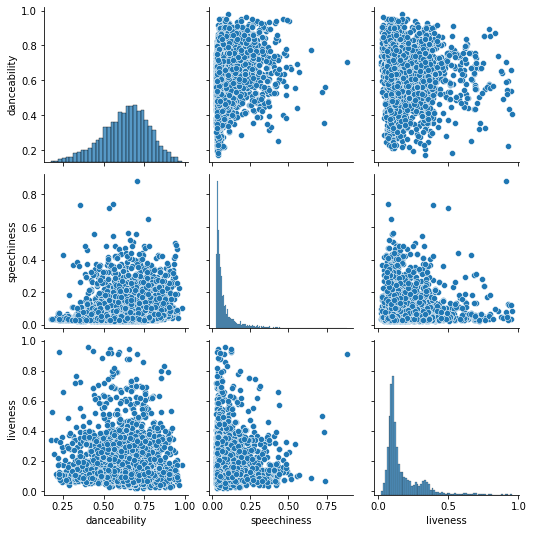

In [35]:
# Queen!
# Queen очень хороши в живых выступлениях.
# Посмотрим на взаимосвязь танцевальности, речи и вероятности того, что исполнение было вживую.
# Живые выступления более танцевальны и речи в них меньше с увеличением "живости"
# А вот танцевальность и речь в принципе и не мешают друг другу.
sns.pairplot(tracks[['danceability', 'speechiness', 'liveness']])

In [36]:
# Интересен удивительный трек с большим объёмом речи и при этом живой
tracks[(tracks['speechiness'] > 0.8) & (tracks['liveness'] > 0.8)]

,track_name,artist_name,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
3169,Skit,BTS,180.0,2020-11-20,4,0.703,0.321,4.0,-13.135,1.0,0.884,0.864,0.0,0.908,0.544,114.822


In [37]:
# В итоге это какое-то полу-интервью какого-то корейского бойзбенда. И что они там на своих Филиппинах слушают?
# Вызывает вопрос, почему алгоритм Spotify нашёл здесь акустику.

0.08228032440056417


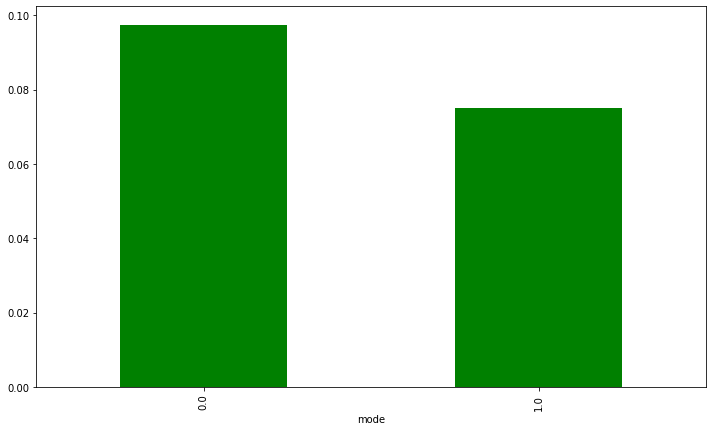

In [38]:
# Также проверим, что в песнях в минорном ладе слов как правило больше, чем в мажорном.
speech_by_mode = tracks.groupby('mode')['speechiness'].mean()
print(tracks['speechiness'].mean())
speech_by_mode.plot(kind = 'bar', color = 'green')


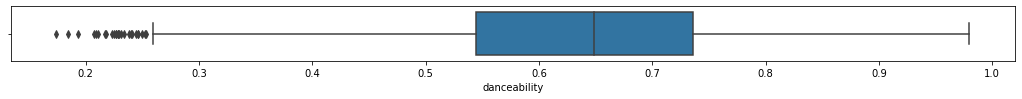

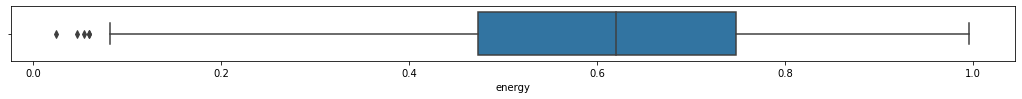

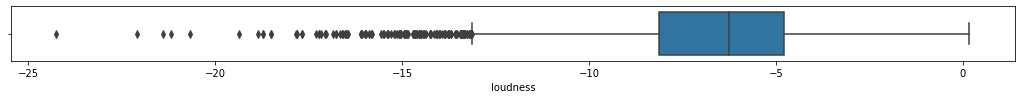

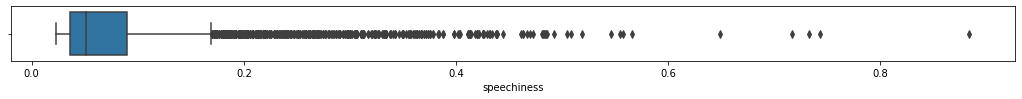

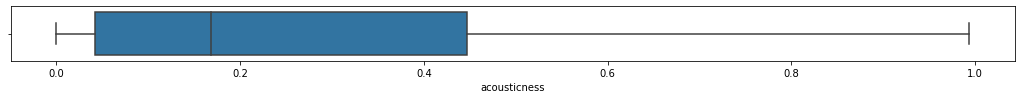

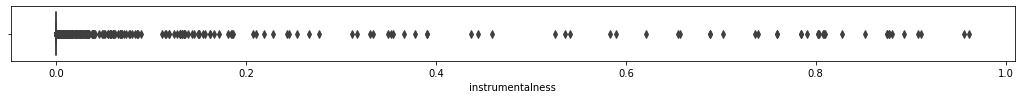

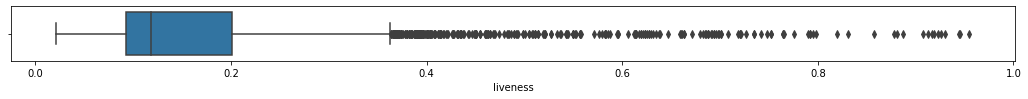

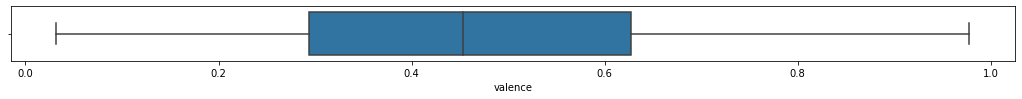

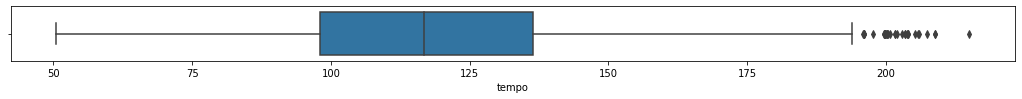

In [39]:
# Посмотрим, наконец, на выбросы в данных.
# Но так как числовых атрибутов много, и большая их часть имеет одинаковую систему измерения, то сделаем ящики по всем.
# Гипотезой в данном случае будет просто тот факт, что в выбранных атрибутах выбросы будут.
box_df = tracks[[
       'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
for column in box_df:
    plt.figure(figsize=(18,1))
    sns.boxplot(data=box_df, x=column)
   

In [40]:
# И как ни странно - не везде выбросы. Очень много в речи, инструменталке и живом исполнении. Это ожидаемо.
# А вот акустичность и жизнерадостность, видимо, рассчитываются так, что появляются практически везде, 
# но при этом нигде не выпрыгивают за рамки. Это особенно странно с акустичностью. Рассчёт этого параметра вызывает вопросы. 

In [41]:
# А ещё мы нашли трек с ошибочным показателем. Громкость в данном датасете в диапазоне от -60 до 0. 
tracks[tracks['loudness'] > 0]

,track_name,artist_name,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1358,Welcome to the Party (with French Montana & Li...,Diplo,182.0,2018-05-15,65,0.618,0.845,2.0,0.175,1.0,0.132,0.114,0.0,0.415,0.486,171.921
